In [1]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Dot, Add, Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf

In [2]:
model =  tf.keras.models.load_model('model_CF.h5')

In [3]:
user_embeddings = model.get_layer('embedding_4').get_weights()[0]
movie_embeddings = model.get_layer('embedding_5').get_weights()[0]

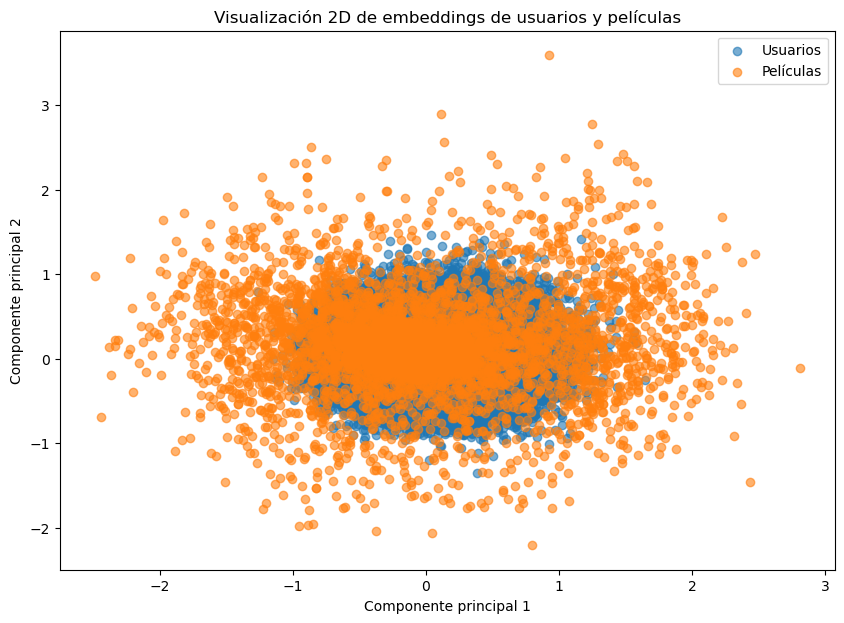

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Usar PCA para reducir dimensionalidad a 2D
pca = PCA(n_components=2)
user_embeddings_2d = pca.fit_transform(user_embeddings)
movie_embeddings_2d = pca.fit_transform(movie_embeddings)

# Visualizar embeddings
plt.figure(figsize=(10, 7))
plt.scatter(user_embeddings_2d[:, 0], user_embeddings_2d[:, 1], label='Usuarios', alpha=0.6)
plt.scatter(movie_embeddings_2d[:, 0], movie_embeddings_2d[:, 1], label='Películas', alpha=0.6)
plt.legend()
plt.title('Visualización 2D de embeddings de usuarios y películas')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

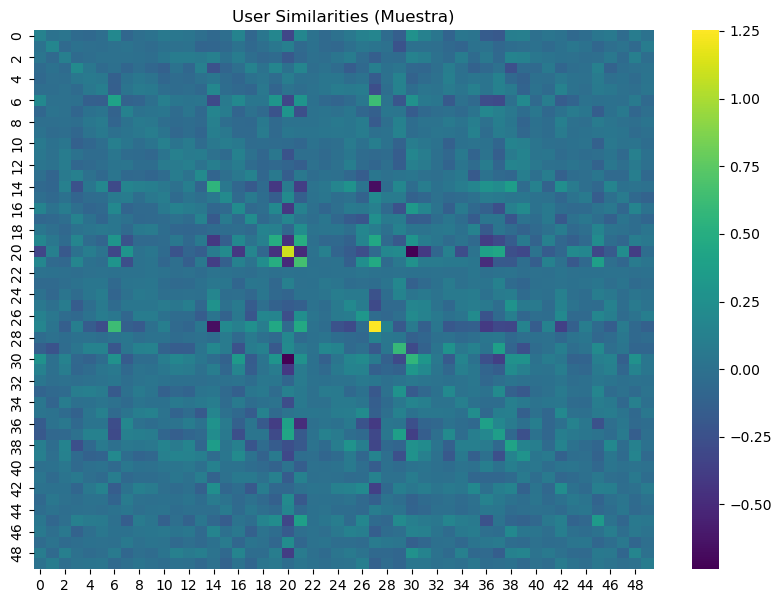

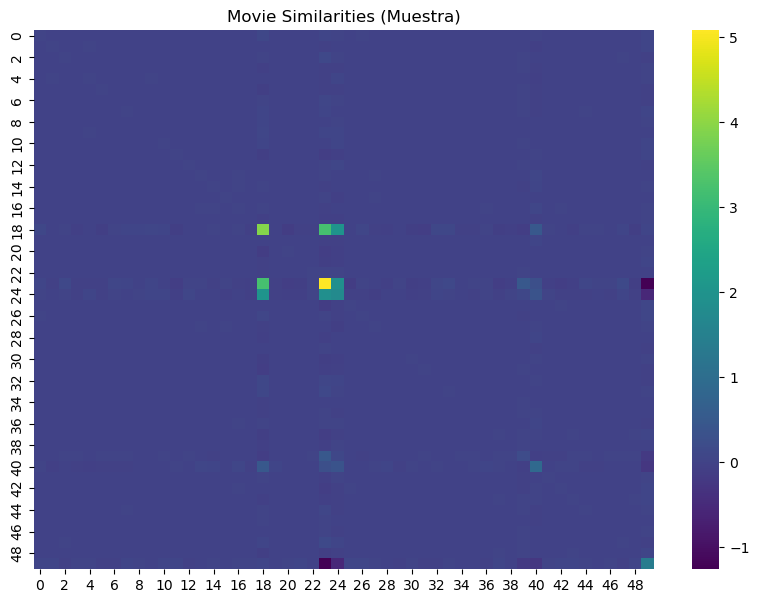

In [5]:
import seaborn as sns
import numpy as np

num_samples = 50
sample_user_embeddings = user_embeddings[1000:1000+num_samples]
sample_movie_embeddings = movie_embeddings[1000:1000+num_samples]

user_similarities = np.dot(sample_user_embeddings, sample_user_embeddings.T)
movie_similarities = np.dot(sample_movie_embeddings, sample_movie_embeddings.T)

plt.figure(figsize=(10, 7))
sns.heatmap(user_similarities, cmap='viridis')
plt.title('User Similarities (Muestra)')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(movie_similarities, cmap='viridis')
plt.title('Movie Similarities (Muestra)')
plt.show()

Usuarios más similares al usuario 1: [(71625, 0.997972413608151), (4538, 0.9972037387649021), (22362, 0.9970018113910754), (217921, 0.9953987862158074), (196822, 0.9953097185896506), (227819, 0.9951973837667673), (185631, 0.9951735614551582), (85734, 0.9948215339578195), (206233, 0.9946646969339247), (200080, 0.994127493850805), (152850, 0.9938275826833529), (33891, 0.9935691290716179), (241864, 0.9931458410641476), (231921, 0.9929037698210955), (12651, 0.9922252561784816), (122633, 0.9921157515160803), (41837, 0.9919688106135386), (202134, 0.9916605925961375), (90040, 0.9913497052551601), (121832, 0.9912537017405646)]
Películas más similares a la película 20: [(66451, 0.9971641724456406), (104347, 0.9970087868988152), (175277, 0.9967502852013903), (65621, 0.9965431658206544), (14111, 0.9956614593184537), (151470, 0.9955588941259612), (41954, 0.9952691073152475), (12462, 0.9950951018583328), (143468, 0.9936322289691853), (6687, 0.9935634832205239), (103534, 0.9935630965833795), (105966

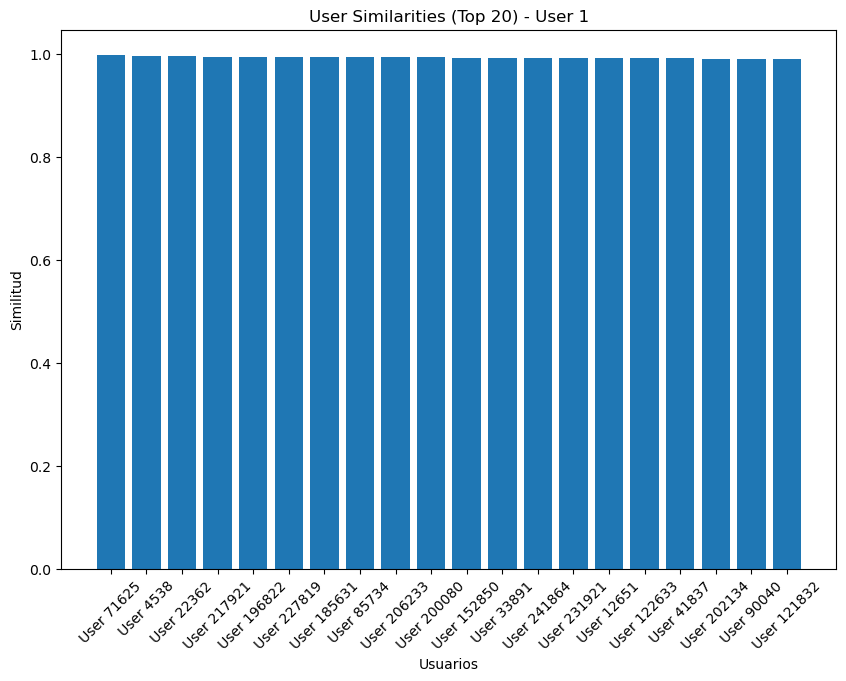

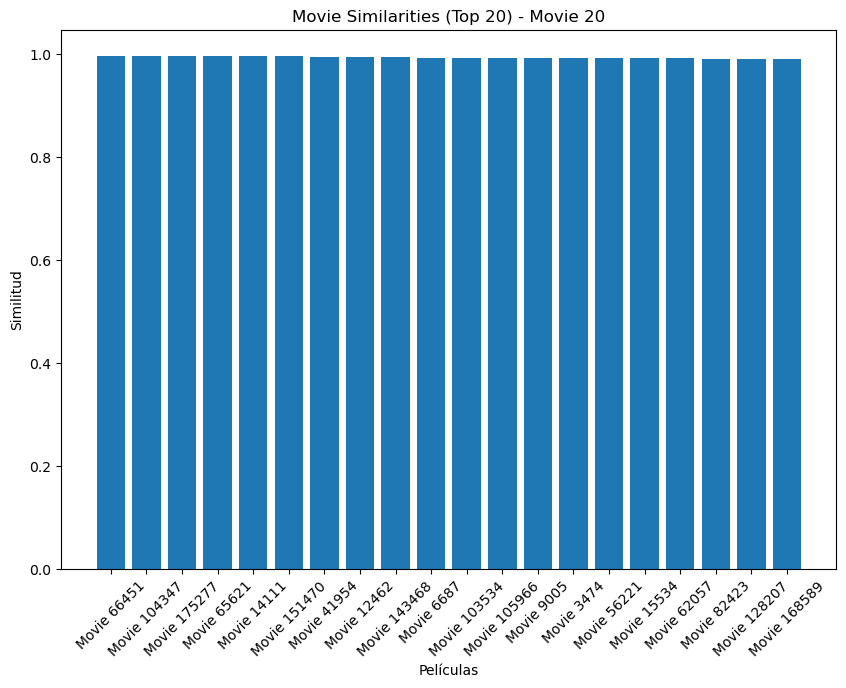

In [7]:
from scipy.spatial.distance import cosine

def most_similar(embedding_matrix, index, top_n=20):
    similarities = []
    target_vector = embedding_matrix[index]
    for i, vector in enumerate(embedding_matrix):
        if i != index:
            similarity = 1 - cosine(target_vector, vector)  # Cosine similarity
            similarities.append((i, similarity))
    similarities.sort(key=lambda x: x[1], reverse=True)  # Sort by descending similarity
    return similarities[:top_n]

user_id = 1
similar_users = most_similar(user_embeddings, user_id)
print("Usuarios más similares al usuario 1:", similar_users)

movie_id = 20
similar_movies = most_similar(movie_embeddings, movie_id)
print("Películas más similares a la película 20:", similar_movies)

user_indices, user_similarities = zip(*similar_users)

plt.figure(figsize=(10, 7))
plt.bar(range(len(user_similarities)), user_similarities, tick_label=[f"User {i}" for i in user_indices])
plt.title(f"User Similarities (Top {len(user_indices)}) - User {user_id}")
plt.xlabel("Usuarios")
plt.ylabel("Similitud")
plt.xticks(rotation=45)
plt.show()

movie_indices, movie_similarities = zip(*similar_movies)

plt.figure(figsize=(10, 7))
plt.bar(range(len(movie_similarities)), movie_similarities, tick_label=[f"Movie {i}" for i in movie_indices])
plt.title(f"Movie Similarities (Top {len(movie_indices)}) - Movie {movie_id}")
plt.xlabel("Películas")
plt.ylabel("Similitud")
plt.xticks(rotation=45)
plt.show()